Side View


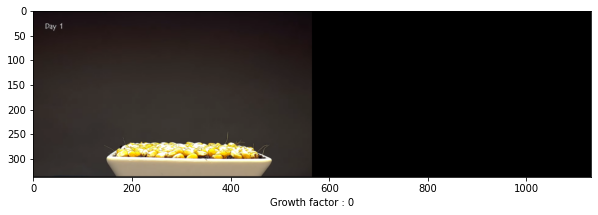

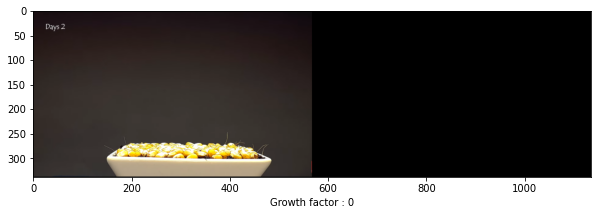

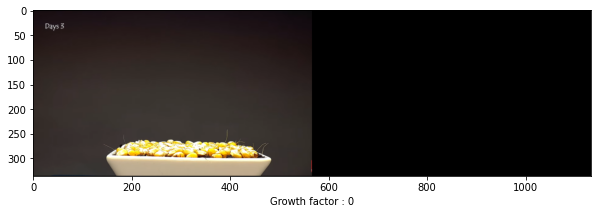

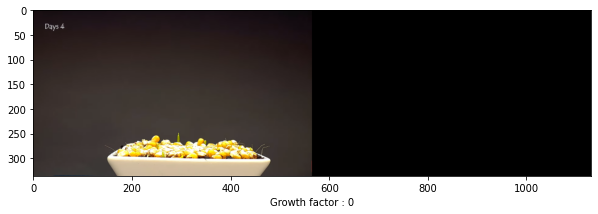

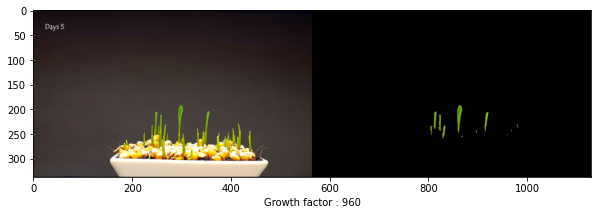

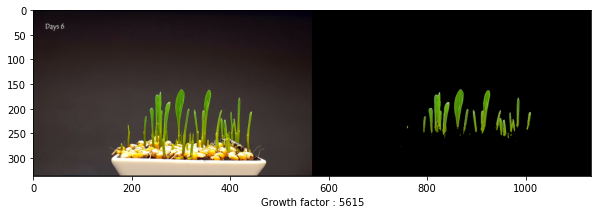

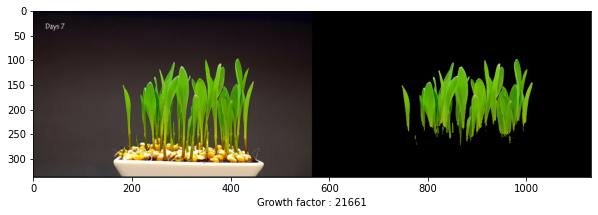

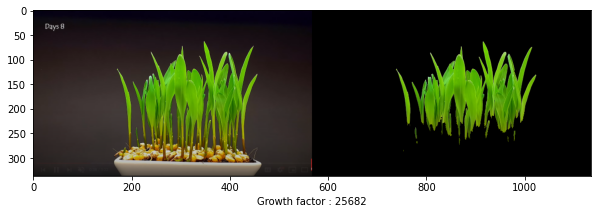

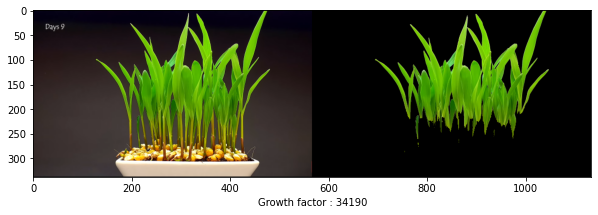

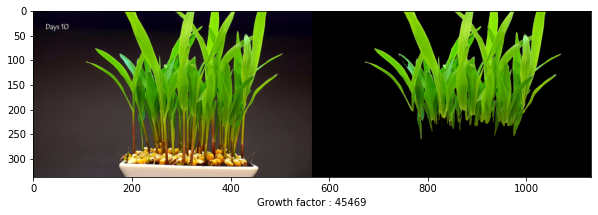

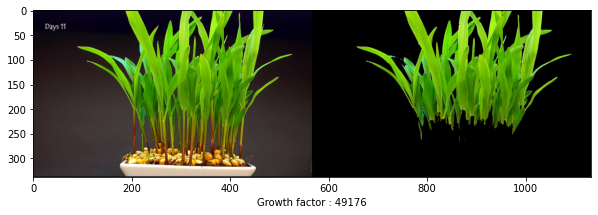

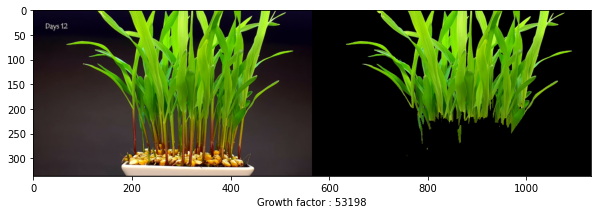

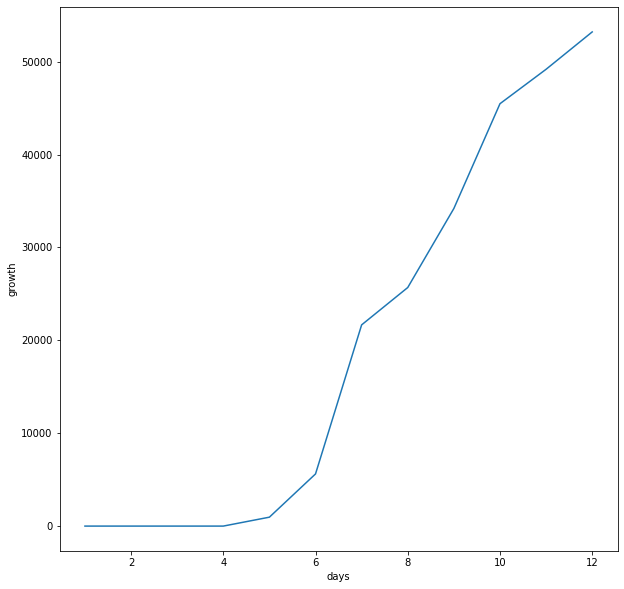

Top View


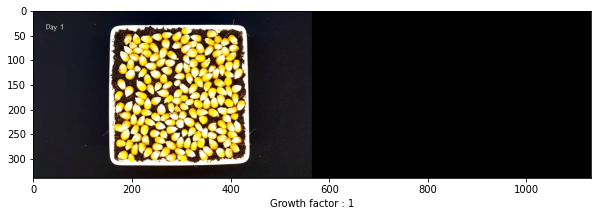

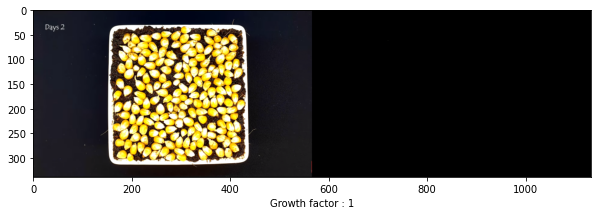

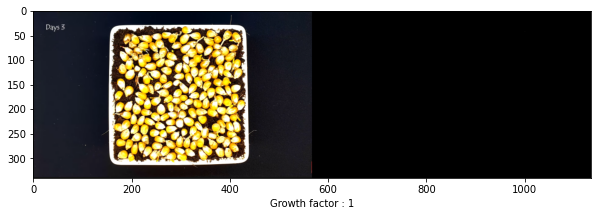

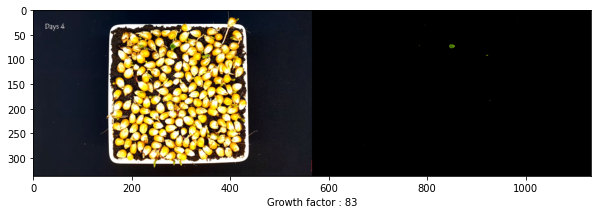

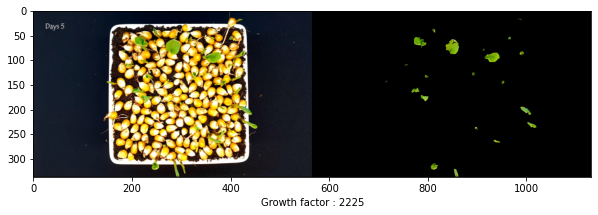

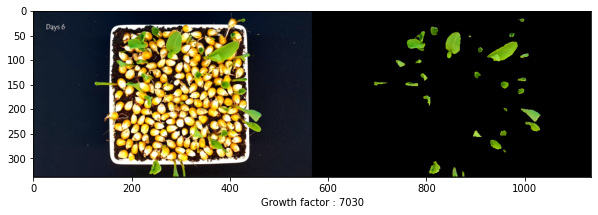

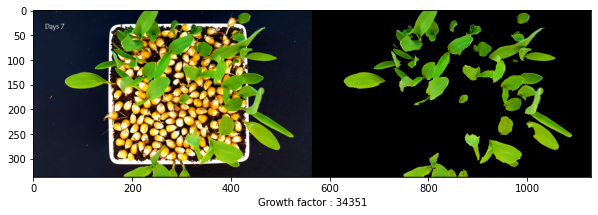

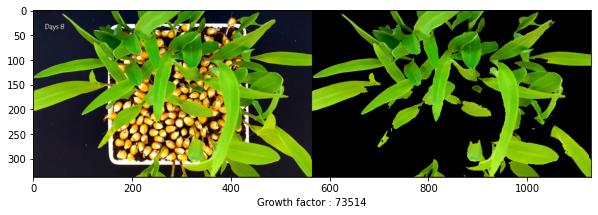

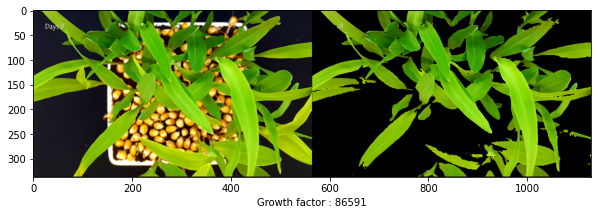

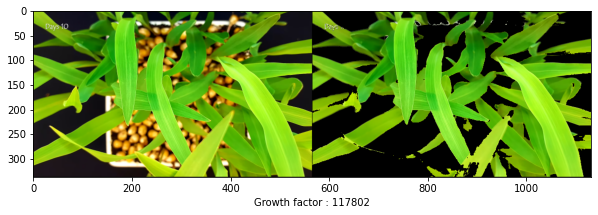

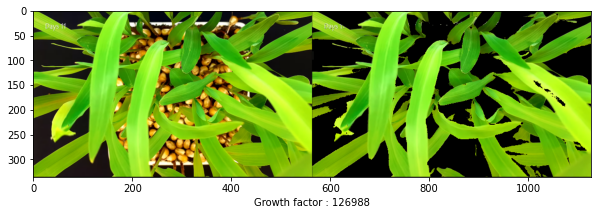

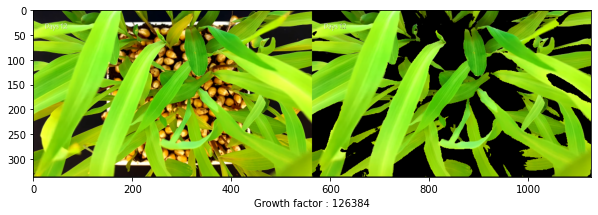

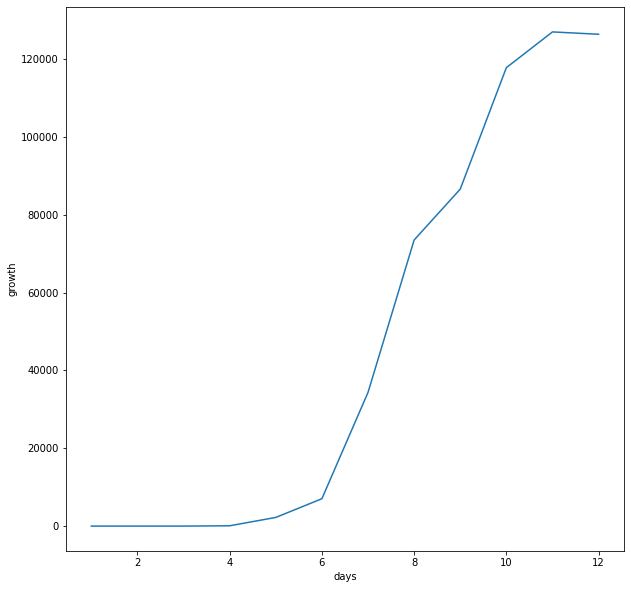

In [4]:
'''
iGrow

PLANT GROWTH DETECTION

Help: Simply click on the close button of the pop up window to go to the next image or plot

The pictures used for testing is from https://www.youtube.com/watch?v=-vffKB8ma7Q

'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

f=open("data.txt","a+")

#opening the images by creating the path names using a for loop and string concat
for j in range(2):
    lix=[]
    liy=[]
    if j==0:
        print("Side View")
        f.write("Side View\n")
    else:
        print("Top View")
        f.write("Top View\n")
        
    for i in range(1,13):
        if j==0:
            fname="Side_view/"+str(i)+".PNG"
        else:
            fname="Top_view/"+str(i)+".PNG"
            
        # Reading the image
        img = cv2.imread(fname)
        raw_img = img.copy()
        
        #changing the size of the image to display it in the given frame
        scale_percent = 50 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
          
        # resizing the image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

        ## converting the image from bgr to hsv
        hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)

        #masking the green pixels (hsv values from (36,25,25) to (70, 255,255)) in the image
        mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))
        
        # slice the green part and highlight the plant part by covering the background with a black cover 
        imask = mask>0
        green = np.zeros_like(resized, np.uint8)
        green[imask] = resized[imask]
        count = cv2.countNonZero(mask)

        #Everytime when a new picture is taken the data is stored in a text file which is then exported for use in other parts of the program
        f.write("Day"+str(i)+':'+str(count))
        f.write("\n")

        #the data is stored in two lists for plotting
        lix.append(i)
        liy.append(count)
        
        #the images are displayed one by one
        resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        green = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
        Hori = np.concatenate((resized, green), axis=1)
        plt.figure(figsize=(10, 10))
        plt.xlabel("Growth factor : " + str(count))
        plt.imshow(Hori)
        
    #The data is plotted and displayed
    plt.figure(figsize=(10, 10))
    plt.plot(lix,liy)
    plt.xlabel("days")
    plt.ylabel("growth")
    plt.show()
    f.write("\n")
    
f.close()
